In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score,cross_validate

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('../data/Premiums_young.xlsx')
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857


In [3]:
df.shape

(20096, 13)

In [4]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [5]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

Here we replace all the spaces into '_' and make all the col names in small or lower case

In [6]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [7]:
# Let see the persentage of missing data

df.isna().sum()/df.count()*100

age                      0.000000
gender                   0.000000
region                   0.000000
marital_status           0.000000
number_of_dependants     0.000000
bmi_category             0.000000
smoking_status           0.009953
employment_status        0.004976
income_level             0.019908
income_lakhs             0.000000
medical_history          0.000000
insurance_plan           0.000000
annual_premium_amount    0.000000
dtype: float64

as we can notice the percentage is very low we can drop those missing records

In [8]:
df.dropna(how='any',inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267
std,2.294052,0.940713,23.420493,2749.906347
min,18.000000,-3.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.250000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,790.000000,18186.000000


In [11]:
df[df['number_of_dependants']<0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
150,23,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Freelancer,10L - 25L,18,No Disease,Silver,9309
871,18,Male,Southwest,Unmarried,-3,Overweight,No Smoking,Freelancer,25L - 40L,28,No Disease,Silver,8095
906,19,Male,Northwest,Unmarried,-3,Underweight,No Smoking,Freelancer,25L - 40L,40,No Disease,Bronze,4641
2462,20,Male,Northeast,Unmarried,-3,Underweight,Regular,Freelancer,10L - 25L,20,Diabetes,Silver,9640
3059,20,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Salaried,> 40L,77,No Disease,Silver,9299
3120,25,Male,Northwest,Unmarried,-1,Underweight,No Smoking,Salaried,10L - 25L,13,No Disease,Bronze,7234
3780,23,Female,Southeast,Unmarried,-3,Normal,Regular,Freelancer,25L - 40L,40,No Disease,Bronze,5003
5593,25,Male,Northwest,Unmarried,-1,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,6299
7585,22,Male,Northwest,Unmarried,-3,Normal,Occasional,Self-Employed,<10L,8,No Disease,Gold,13596
9765,18,Female,Southeast,Unmarried,-1,Underweight,No Smoking,Self-Employed,<10L,4,No Disease,Bronze,9366


In [12]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-3, -1])

In [13]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20090 entries, 0 to 20095
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    20090 non-null  int64 
 1   gender                 20090 non-null  object
 2   region                 20090 non-null  object
 3   marital_status         20090 non-null  object
 4   number_of_dependants   20090 non-null  int64 
 5   bmi_category           20090 non-null  object
 6   smoking_status         20090 non-null  object
 7   employment_status      20090 non-null  object
 8   income_level           20090 non-null  object
 9   income_lakhs           20090 non-null  int64 
 10  medical_history        20090 non-null  object
 11  insurance_plan         20090 non-null  object
 12  annual_premium_amount  20090 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 2.1+ MB


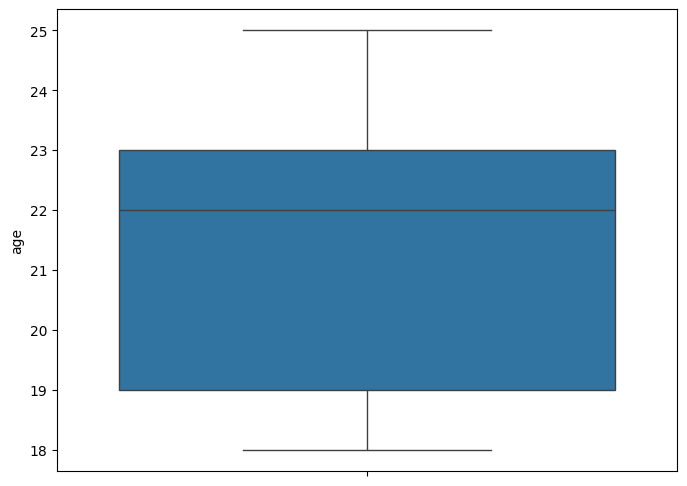

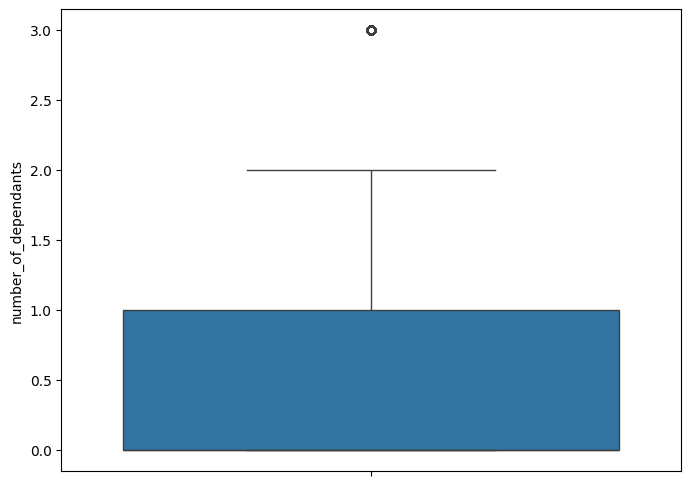

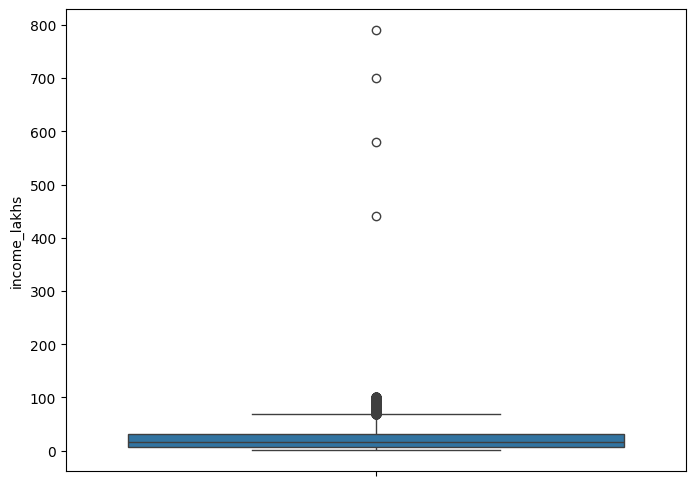

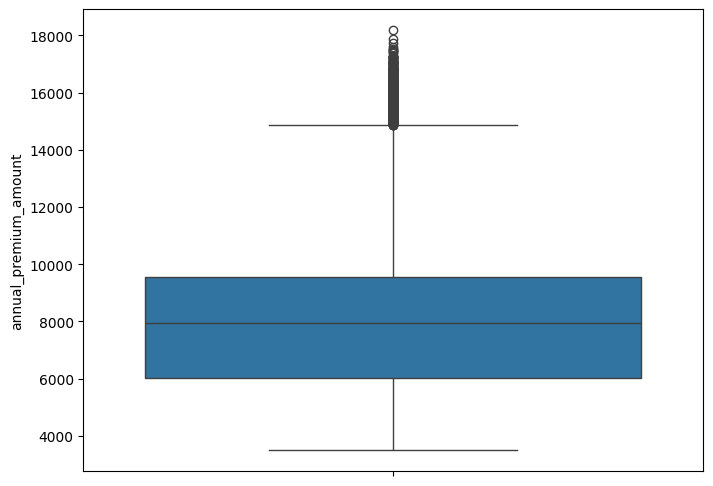

In [15]:
for i in df.columns:
    if df[i].dtype != 'object':
        plt.figure(figsize=(8,6))
        sns.boxplot(df[i])

In [16]:
num_feature = df.select_dtypes(exclude='object').columns
num_feature

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

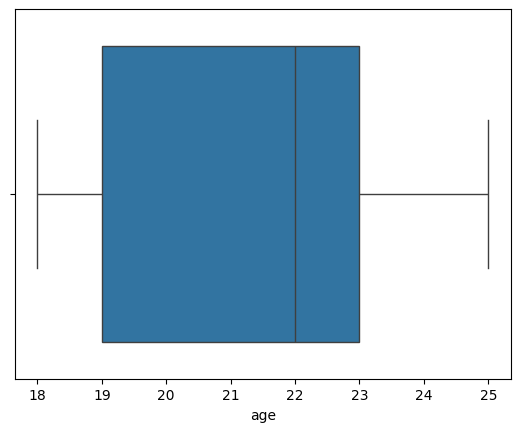

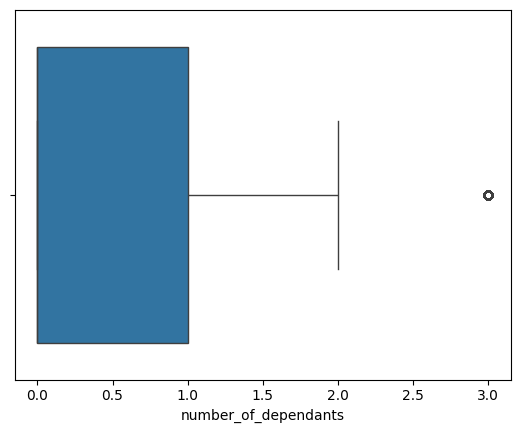

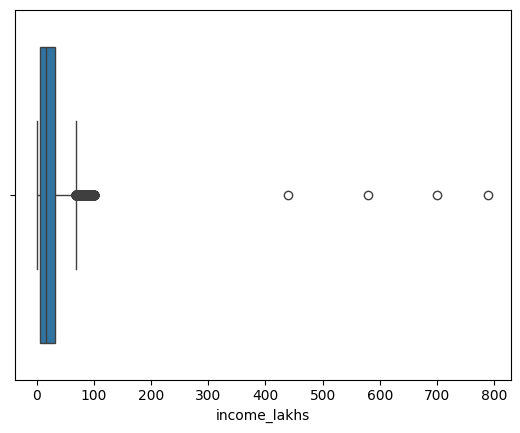

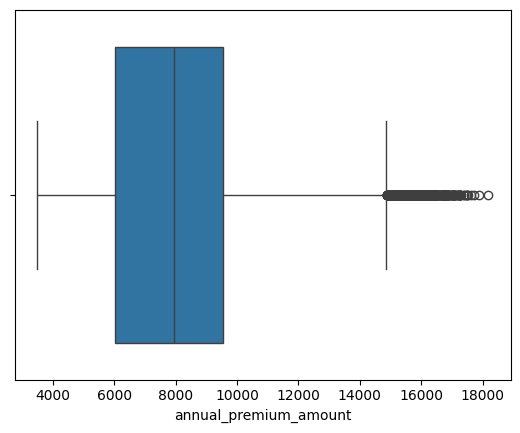

In [17]:
for i in num_feature:
    sns.boxplot(x=df[i])
    plt.show()

In [18]:
# outlier tretment for age

df[df['age']>100]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount


In [19]:
df[df['age']>100]['age'].unique()

array([], dtype=int64)

as we know it is highly unlikly to have age of a person will be around this [224, 124, 136, 203, 356] list so we are droping those records

In [20]:
df1 = df[df['age']<100].copy()
df1['age'].describe()

count    20090.000000
mean        21.494375
std          2.294052
min         18.000000
25%         19.000000
50%         22.000000
75%         23.000000
max         25.000000
Name: age, dtype: float64

<Axes: xlabel='income_lakhs', ylabel='Count'>

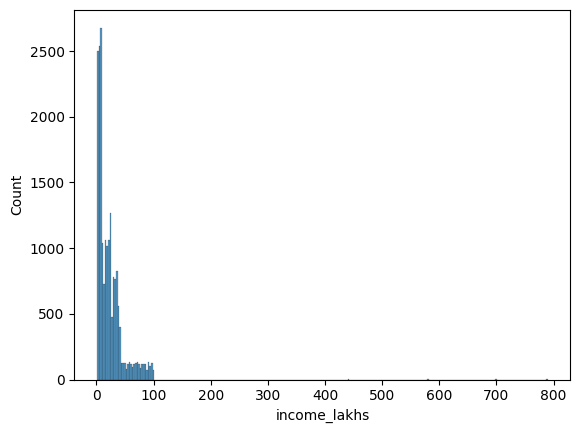

In [21]:
sns.histplot(df1['income_lakhs'])

In [22]:
def get_outliers(col):
    q1,q3 = col.quantile([0.25,0.95])
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr 
    return upper,lower

In [23]:
upper,lower = get_outliers(df1['income_lakhs'])

In [24]:
print(upper,lower)

178.5 -97.5


In [25]:
df1[df1['income_lakhs']>upper].shape

(4, 13)

In [26]:
df2 = df1[df1['income_lakhs']<upper]

In [27]:
df2['income_lakhs'].describe()

count    20086.000000
mean        22.390371
std         21.732062
min          1.000000
25%          6.000000
50%         16.000000
75%         31.000000
max        100.000000
Name: income_lakhs, dtype: float64

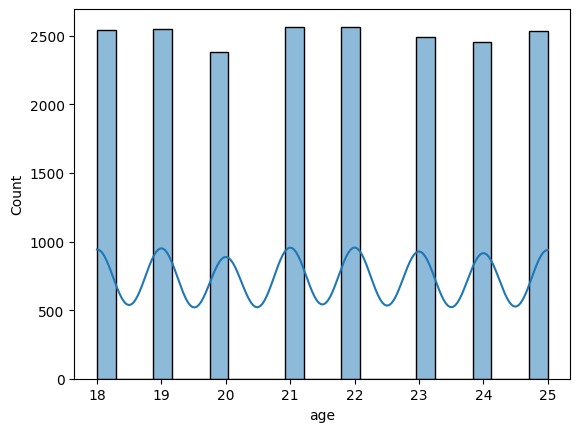

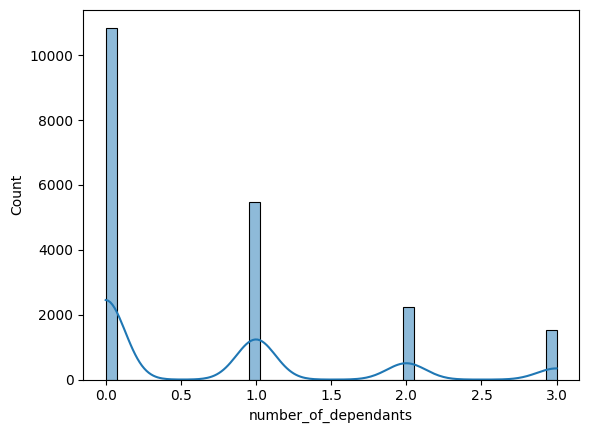

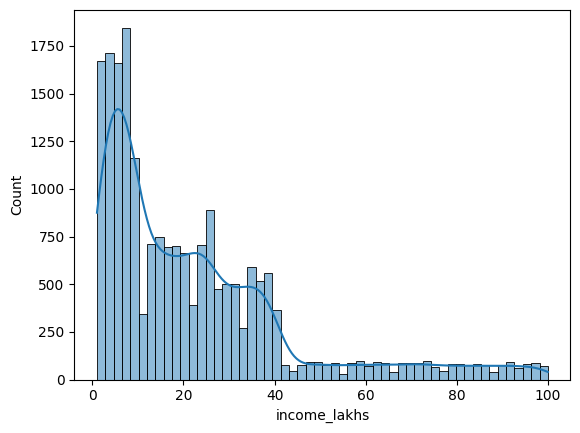

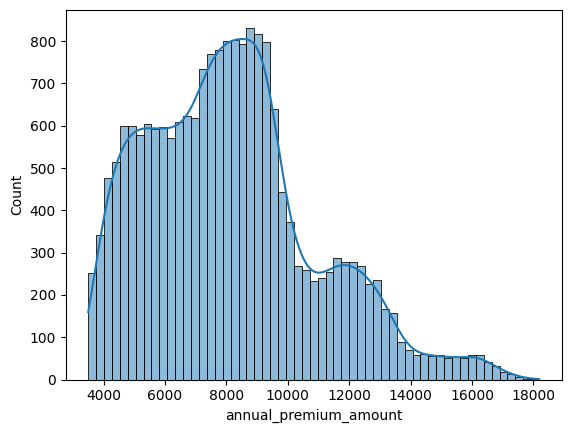

In [28]:
for i in df2.columns:
    if df2[i].dtype != 'object':
        sns.histplot(df2[i],kde=True)
        plt.show()

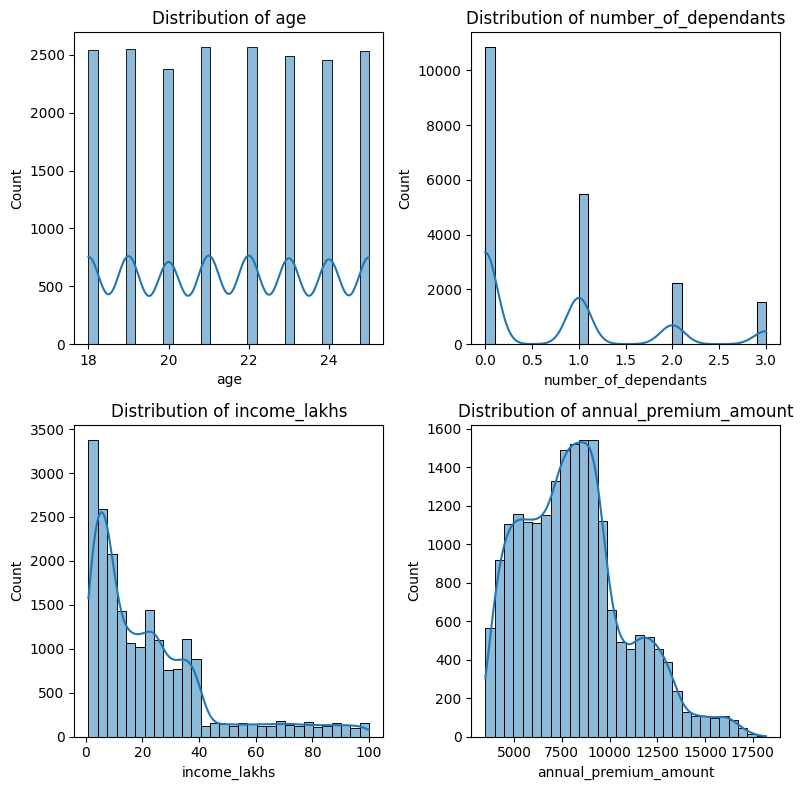

In [29]:
# Select numeric columns
num_cols = [col for col in df2.columns if df2[col].dtype != 'object']

# Define number of columns per row
n_cols = 2
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(8, 4 * n_rows))

for idx, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(df2[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

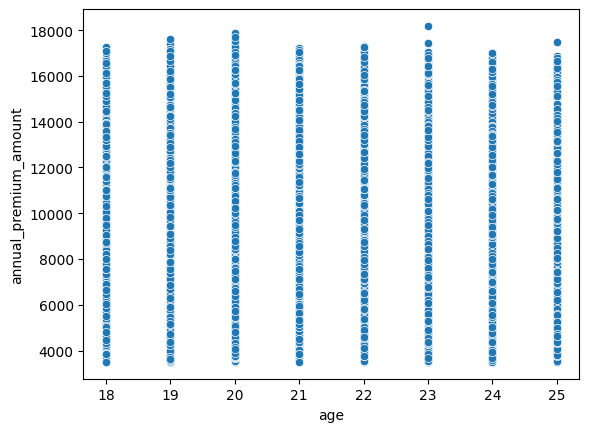

In [30]:
sns.scatterplot(df2,x='age',y='annual_premium_amount')

<Axes: xlabel='age', ylabel='income_lakhs'>

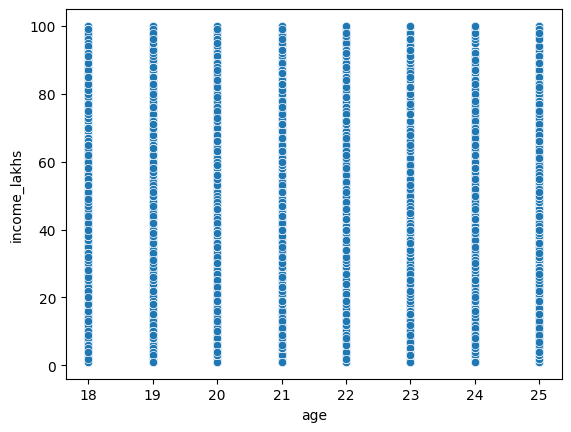

In [31]:
sns.scatterplot(df2,x='age',y='income_lakhs')

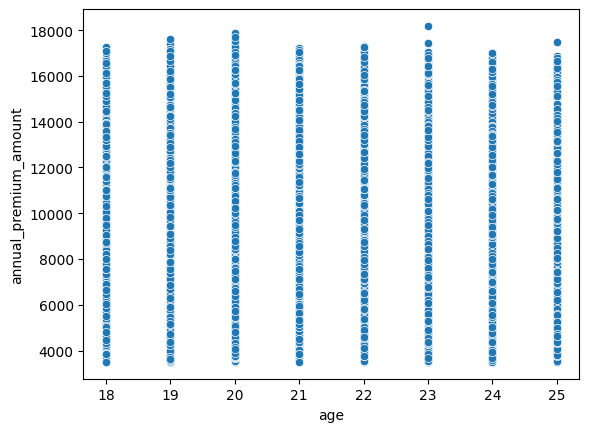

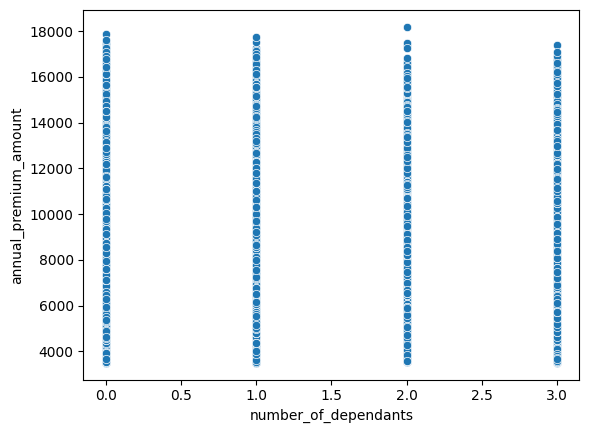

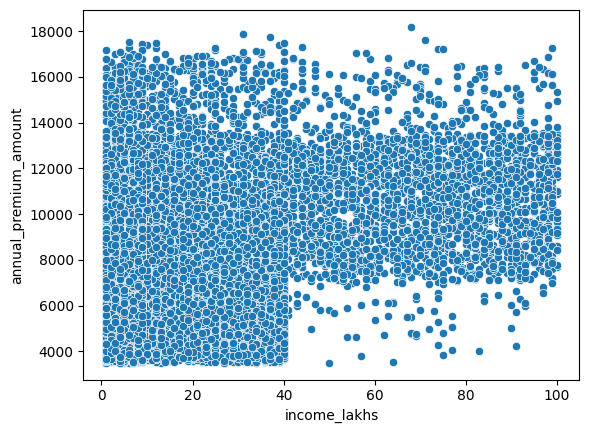

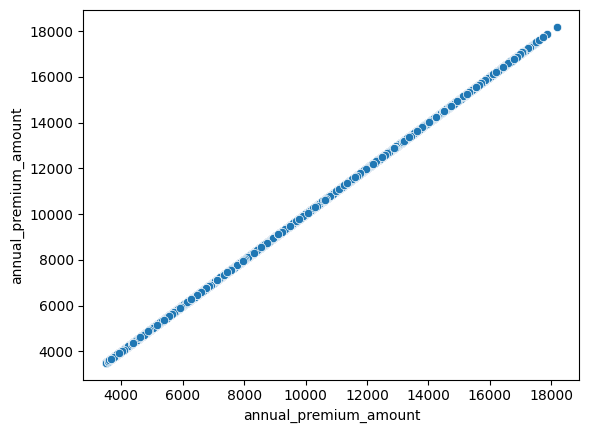

In [32]:
for i in df2.columns:
    if df2[i].dtype != 'object':
        sns.scatterplot(df2,x=i,y='annual_premium_amount')
        plt.show()

In [33]:
cat_features = df2.select_dtypes(include='object').columns
for i in cat_features:
    print(i, ":",df2[i].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [34]:
df2['smoking_status'].replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking'
},inplace=True)

In [35]:
df2['smoking_status'].unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

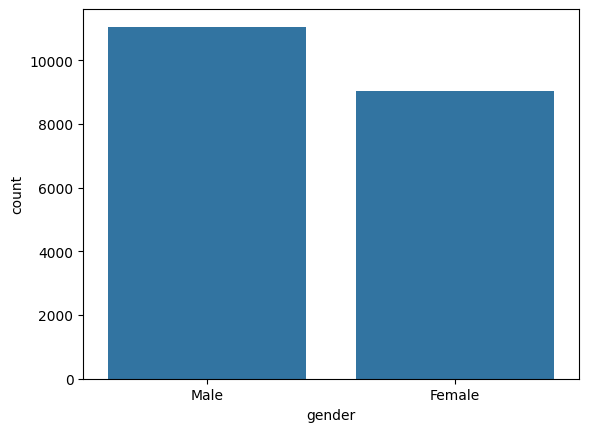

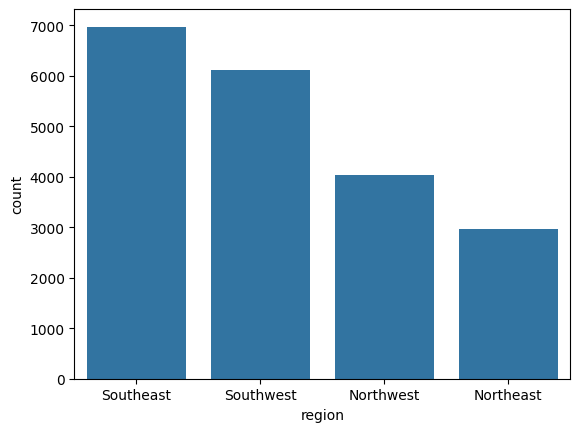

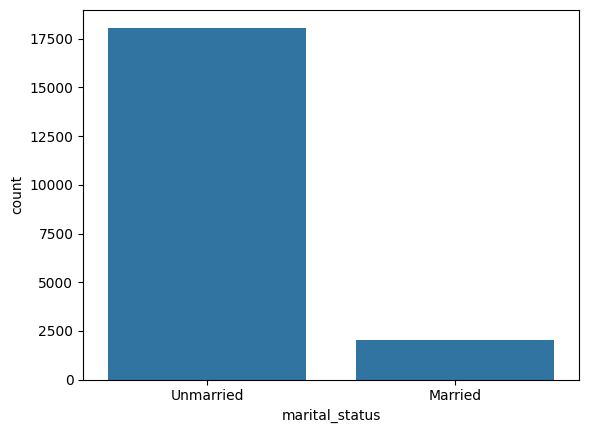

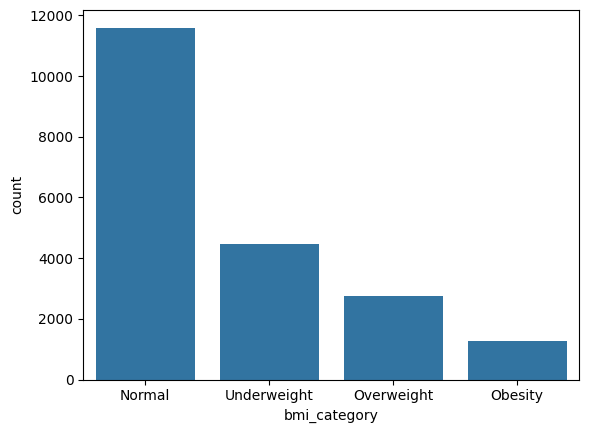

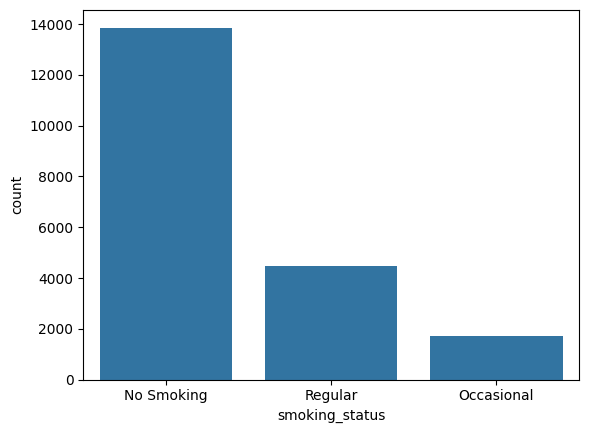

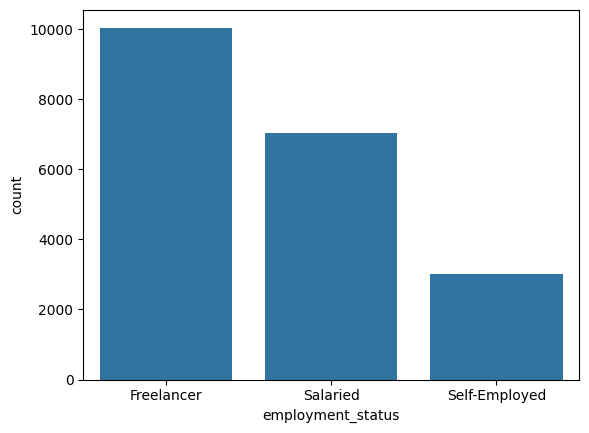

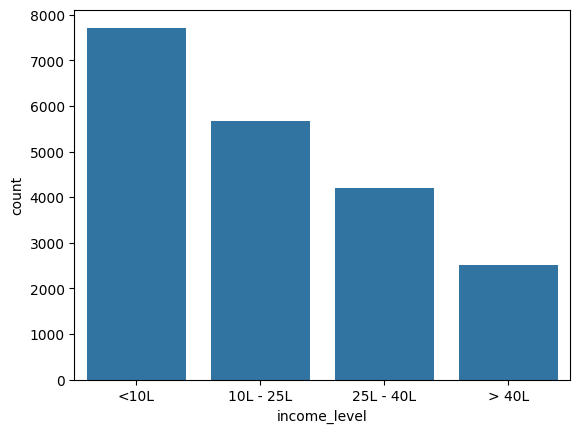

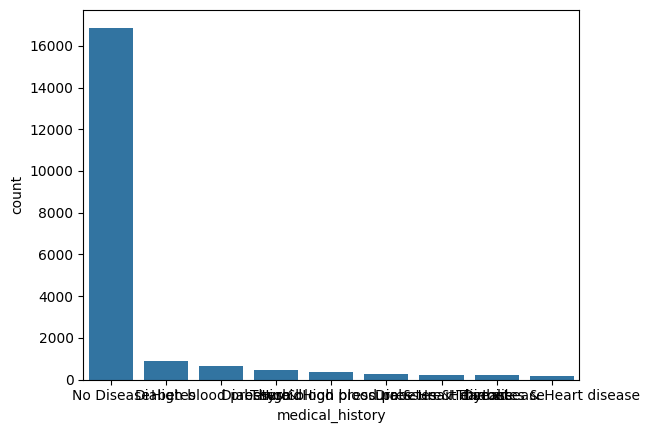

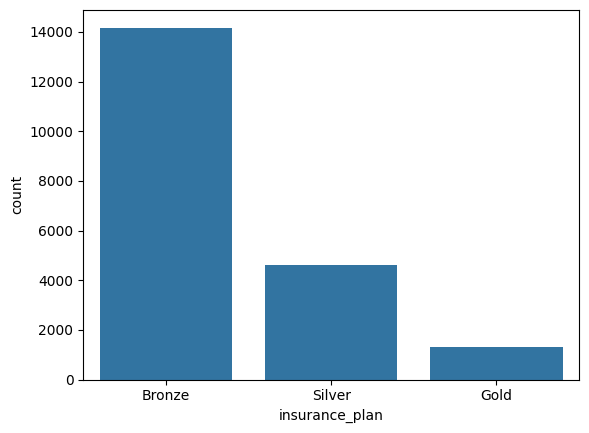

In [36]:
for i in cat_features:
    sns.barplot(df2[i].value_counts())
    plt.show()

In [37]:
for i in cat_features:
    print(df2[i].value_counts(normalize=True))

gender
Male      0.550383
Female    0.449617
Name: proportion, dtype: float64
region
Southeast    0.346958
Southwest    0.304590
Northwest    0.201284
Northeast    0.147167
Name: proportion, dtype: float64
marital_status
Unmarried    0.899881
Married      0.100119
Name: proportion, dtype: float64
bmi_category
Normal         0.577467
Underweight    0.222493
Overweight     0.136513
Obesity        0.063527
Name: proportion, dtype: float64
smoking_status
No Smoking    0.690033
Regular       0.223589
Occasional    0.086379
Name: proportion, dtype: float64
employment_status
Freelancer       0.500000
Salaried         0.350045
Self-Employed    0.149955
Name: proportion, dtype: float64
income_level
<10L         0.384397
10L - 25L    0.281888
25L - 40L    0.209051
> 40L        0.124664
Name: proportion, dtype: float64
medical_history
No Disease                             0.840038
Diabetes                               0.044260
High blood pressure                    0.031315
Thyroid             

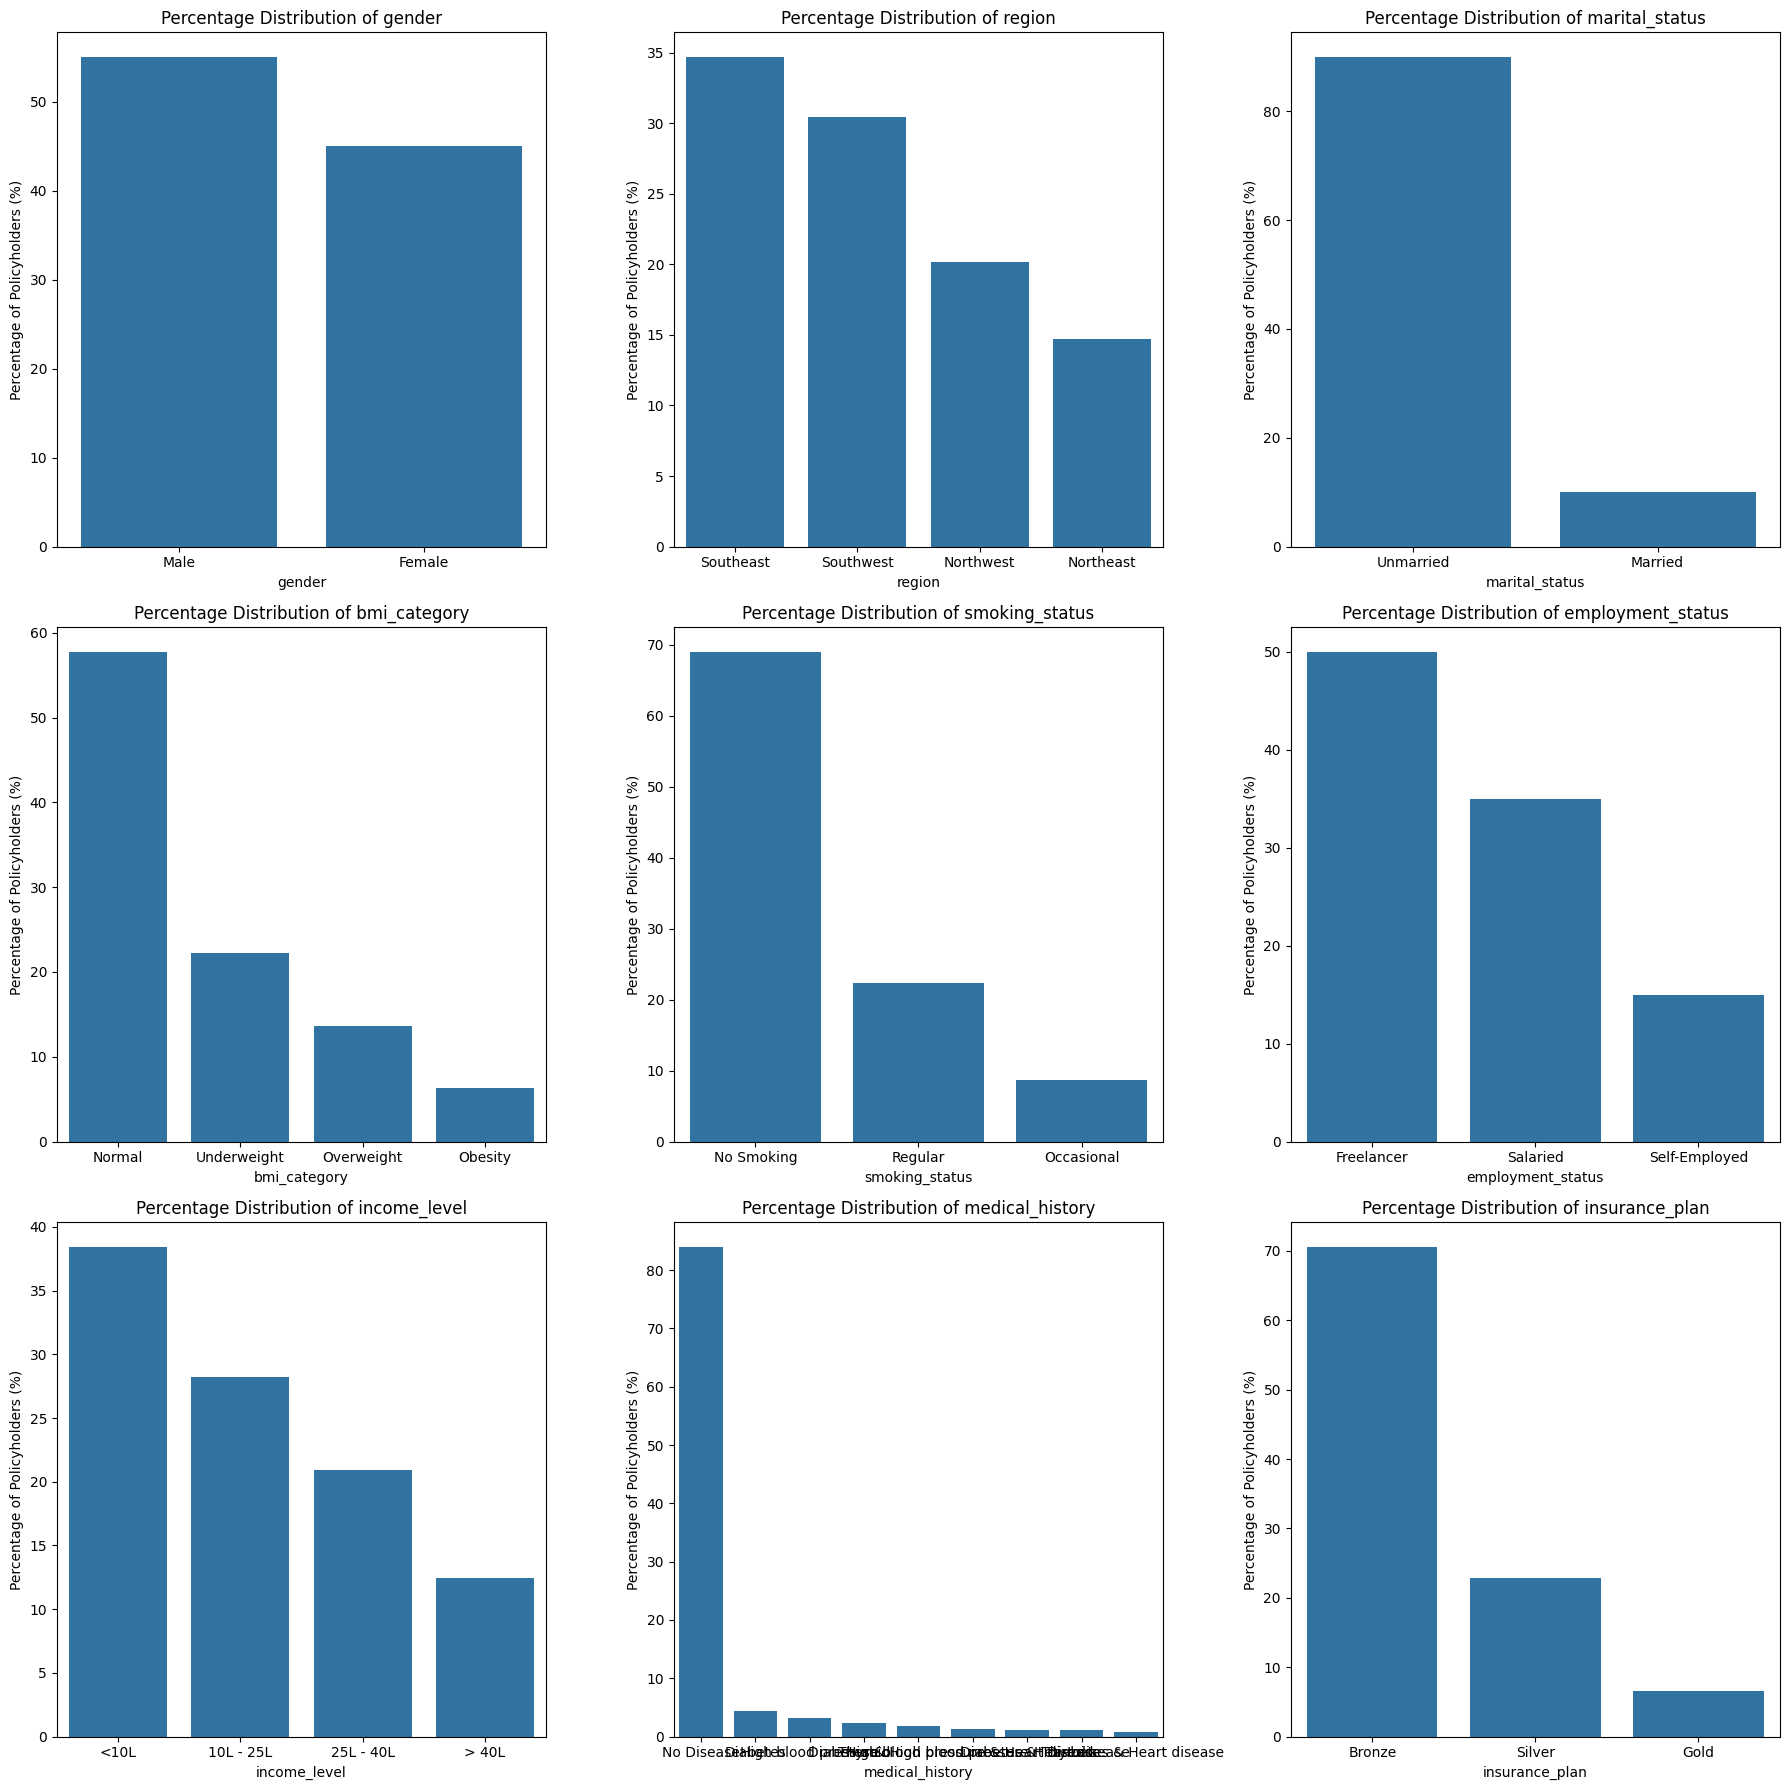

In [38]:
fig,axes = plt.subplots(3,3,figsize=(18,18))
axes = axes.flatten()

for ax,col in zip(axes,cat_features):
    cat_count = df2[col].value_counts(normalize=True)*100
    
    sns.barplot(x=cat_count.index,y=cat_count.values,ax=ax)
    ax.set_title(f'Percentage Distribution of {col}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(col)
    
plt.tight_layout()
plt.show()

In [39]:
tab = pd.crosstab(df2['income_level'],df2['insurance_plan'])
tab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,4508,326,828
25L - 40L,3382,209,608
<10L,6172,404,1145
> 40L,115,366,2023


<Axes: xlabel='income_level'>

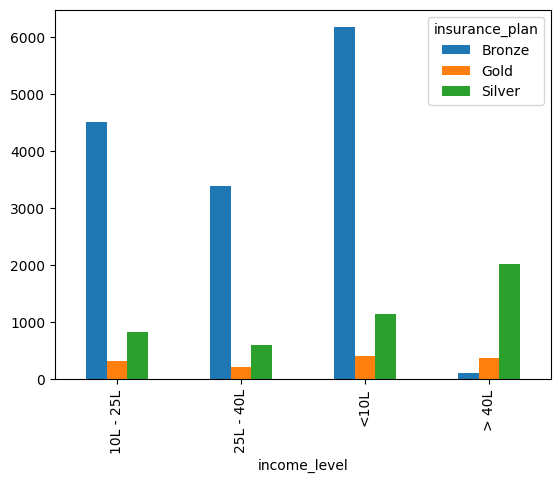

In [40]:
tab.plot(kind='bar')

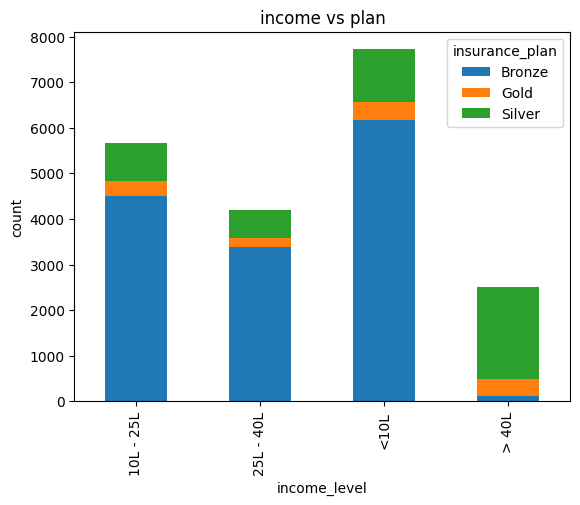

In [41]:
tab.plot(kind='bar',stacked=True)
plt.title('income vs plan')
plt.ylabel('count')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

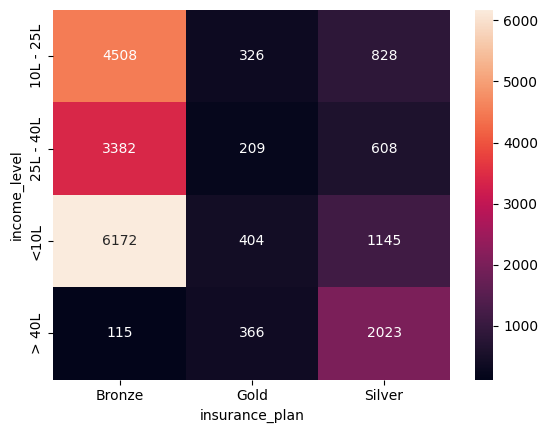

In [42]:
sns.heatmap(tab,annot=True,fmt='d')

In [43]:
df2['medical_history'].unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [44]:
# as per business we have a risk score

risk_score ={
    'diabetes':6,
    'heart disease':8,
    'high blood pressure':6,
    'thyroid':5,
    'no disease':0,
    'none':0
}

In [45]:
df2[['disease1','disease2']] = df2['medical_history'].str.split(' & ',expand=True).apply(lambda x: x.str.lower())
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,None
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,no disease,None
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,no disease,None
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,no disease,None


In [46]:
df2['disease1'].fillna('none',inplace=True)
df2['disease2'].fillna('none',inplace=True)

In [47]:
df2['total_risk_score'] = 0

for x in ['disease1','disease2']:
    df2['total_risk_score'] += df2[x].map(risk_score)

# Normalised the total_risk

max_score = df2['total_risk_score'].max() 
min_score = df2['total_risk_score'].min()
df2['normalised_risk_score'] = (df2['total_risk_score'] - min_score)/(max_score-min_score)

df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalised_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,none,0,0.000000


In [48]:
df2['insurance_plan'].unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [49]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1,'Silver':2,'Gold':3})
df2['insurance_plan'].unique()

array([2, 1, 3])

In [50]:
df2['income_level'].unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [51]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L':2, '25L - 40L':3, '> 40L':4})
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalised_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,1,3,No Disease,2,11050,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,4,97,No Disease,2,11857,no disease,none,0,0.000000


In [52]:
df2['income_level'].unique()

array([4, 1, 2, 3])

In [53]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'disease1', 'disease2', 'total_risk_score',
       'normalised_risk_score'],
      dtype='object')

In [54]:
# drop redandant col

df2.drop(columns=['medical_history','disease1', 'disease2', 'total_risk_score'],axis=1,inplace=True)

In [55]:
noninal_col = ['gender', 'region', 'marital_status','bmi_category', 'smoking_status', 'employment_status']

df2_encode = pd.get_dummies(df2,columns=noninal_col,drop_first=True,dtype=int)
df2_encode.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


<Axes: >

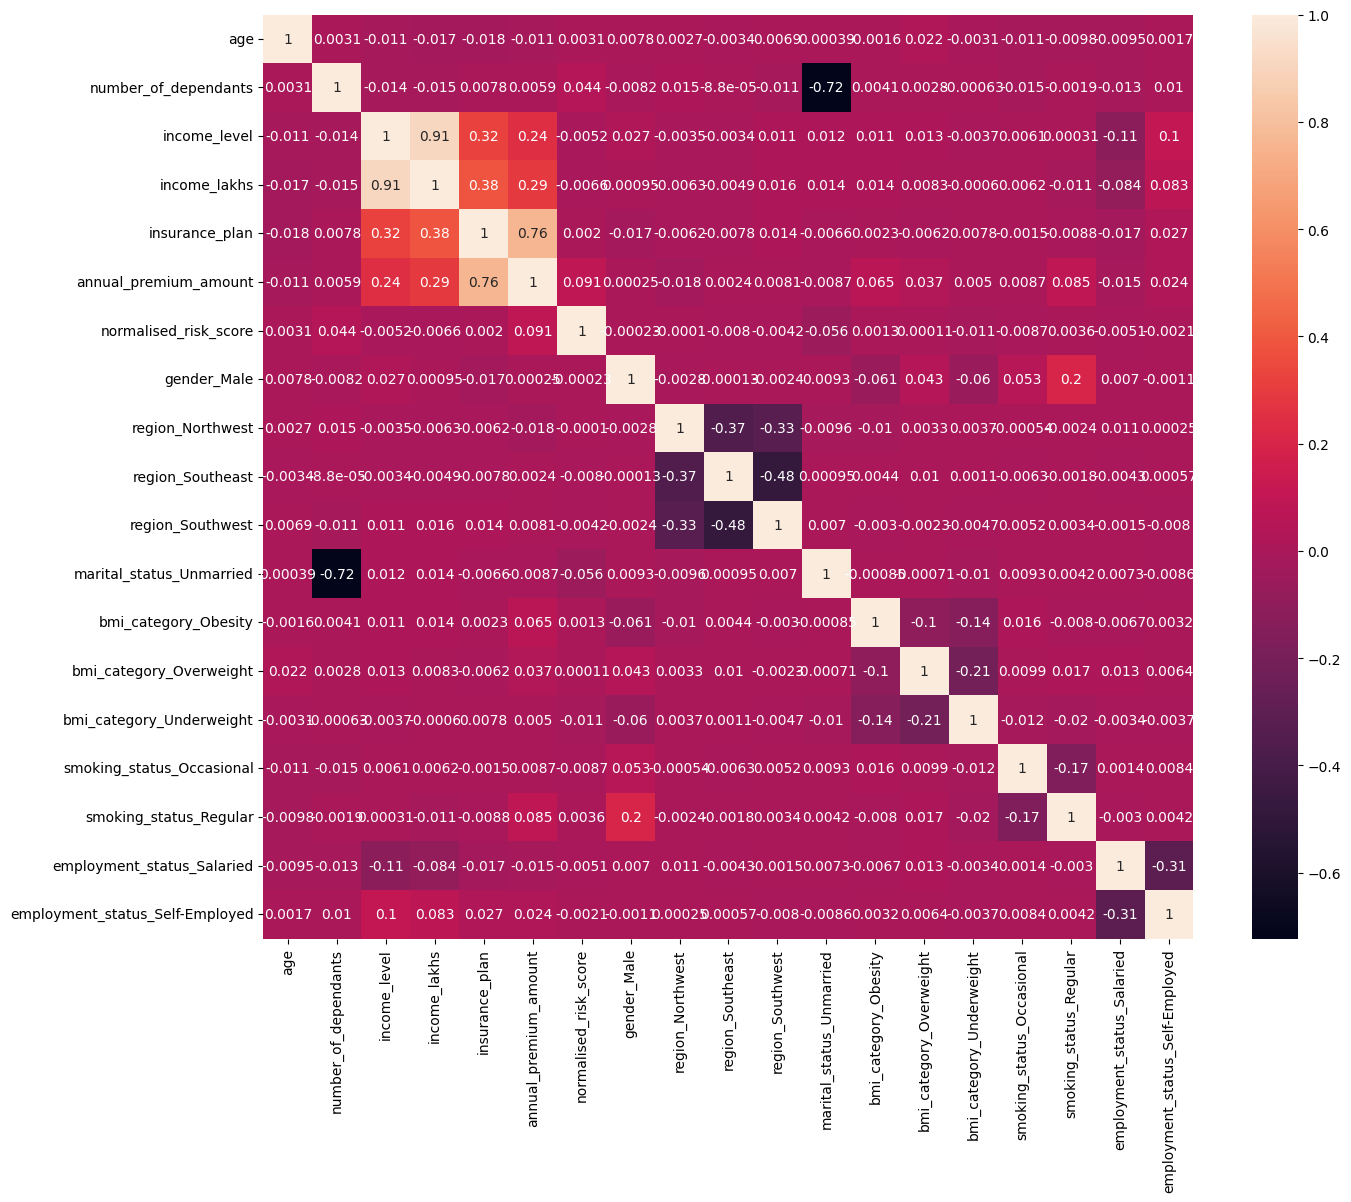

In [56]:
cor = df2_encode.corr()
plt.figure(figsize=(15,12))
sns.heatmap(cor,annot=True)

In [57]:
df2_encode.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,0.000000,0,1,0,0,1,0,0,1,0,0,0,0


In [58]:
x = df2_encode.drop('annual_premium_amount',axis=1)
y = df2_encode['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

col_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
scale = MinMaxScaler()

x[col_to_scale] = scale.fit_transform(x[col_to_scale])
x.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,1.000000,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.000000,0.020202,0.5,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,1.000000,0.969697,0.5,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.333333,0.141414,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.333333,0.131313,0.0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [59]:
x.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
def cal_vif(data):
    vif_df = pd.DataFrame()
    vif_df['column'] = data.columns
    vif_df['vif'] = [variance_inflation_factor (data.values,i) for i in range(data.shape[1])]
    return vif_df

In [61]:
cal_vif(x)

,column,vif
0,age,3.142881
1,number_of_dependants,1.860761
2,income_level,11.928707
3,income_lakhs,11.874242
4,insurance_plan,1.592892
5,normalised_risk_score,1.154223
6,gender_Male,2.310023
7,region_Northwest,2.147701
8,region_Southeast,2.970188
9,region_Southwest,2.730503


In [62]:
cal_vif(x.drop('income_level',axis=1))

,column,vif
0,age,3.141534
1,number_of_dependants,1.858110
2,income_lakhs,2.291873
3,insurance_plan,1.587794
4,normalised_risk_score,1.154174
5,gender_Male,2.299848
6,region_Northwest,2.146767
7,region_Southeast,2.968993
8,region_Southwest,2.729813
9,marital_status_Unmarried,7.299818


In [63]:
x_redused = x.drop('income_level',axis=1)
x_redused.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [64]:
x_train,x_test,y_train,y_test = train_test_split(x_redused,y,test_size=0.3,random_state=42)

print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (14060, 17)
x_test (6026, 17)
y_train (14060,)
y_test (6026,)


In [65]:
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)
y_pred_test = model_lr.predict(x_test)
y_pred_train = model_lr.predict(x_train)

r2_test = r2_score(y_pred_test,y_test)
r2_train = r2_score(y_pred_train,y_train)

print(f'Train Accuracy {r2_train}')
print(f'Test Accuracy {r2_test}')

Train Accuracy 0.34388662940754633
Test Accuracy 0.3453470176399208


In [66]:
model_lr.coef_

array([ 2.36884148e+01, -2.81603858e+01,  6.06515998e+01,  6.97000722e+03,
        1.14617372e+03,  2.27709031e+00, -8.85129128e+01, -2.63407586e+00,
        4.00535339e-01,  3.11161583e+00,  8.48014989e+02,  3.85748545e+02,
        1.86980641e+02,  2.89716954e+02,  6.32388157e+02,  7.72265002e+00,
        2.18415123e+01])

In [67]:
model_lr.intercept_

np.float64(6460.02131456855)

In [68]:
feature_imp = model_lr.coef_

cof_df = pd.DataFrame(feature_imp,index=x_test.columns,columns=['coefficents'])
cof_df = cof_df.sort_values(by='coefficents',ascending=False)
cof_df

,coefficents
insurance_plan,6970.007217
normalised_risk_score,1146.173723
bmi_category_Obesity,848.014989
smoking_status_Regular,632.388157
bmi_category_Overweight,385.748545
smoking_status_Occasional,289.716954
bmi_category_Underweight,186.980641
income_lakhs,60.651600
age,23.688415
employment_status_Self-Employed,21.841512


<Axes: xlabel='coefficents', ylabel='None'>

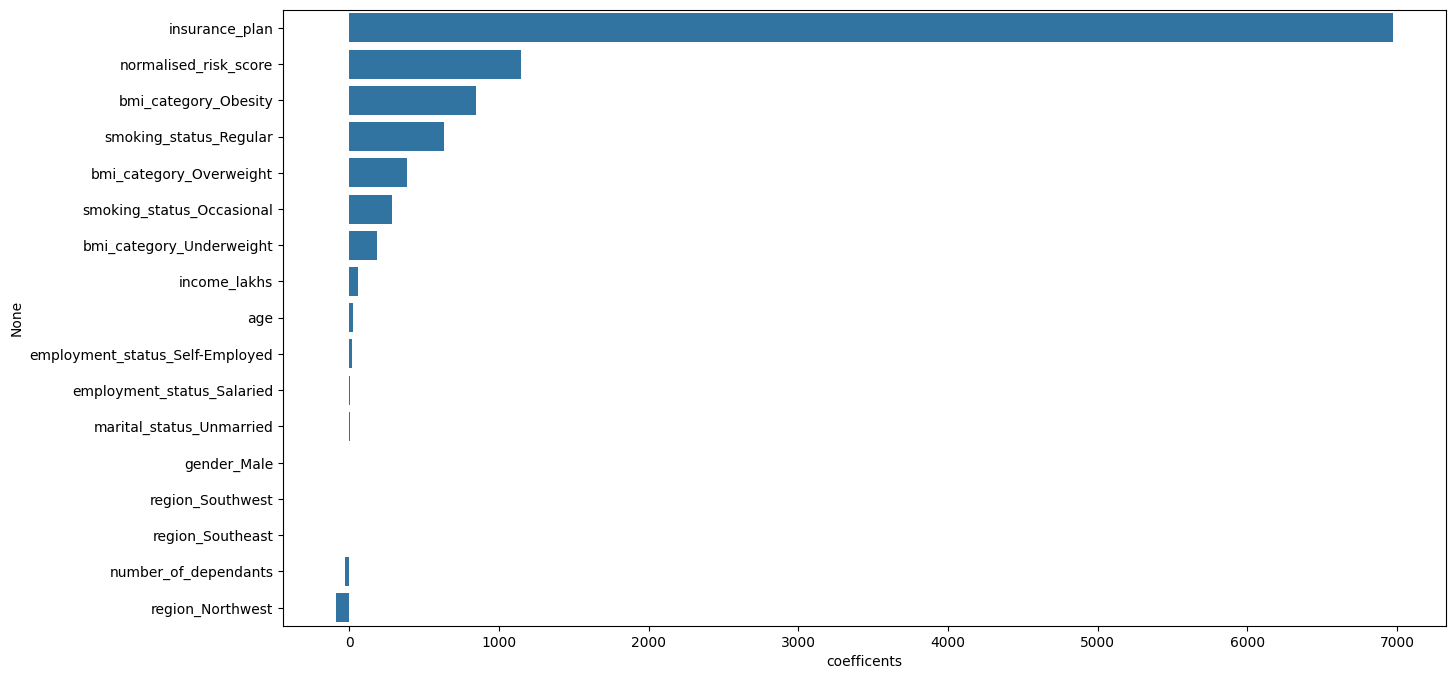

In [69]:
plt.figure(figsize=(15,8))
sns.barplot(cof_df,x=cof_df['coefficents'],y=cof_df.index)


In [70]:
model_rg = Ridge()
model_rg.fit(x_train,y_train)
y_pred_test = model_rg.predict(x_test)
y_pred_train = model_rg.predict(x_train)

r2_test = r2_score(y_pred_test,y_test)
r2_train = r2_score(y_pred_train,y_train)

print(f'Train Accuracy {r2_train}')
print(f'Test Accuracy {r2_test}')

Train Accuracy 0.34283367590748626
Test Accuracy 0.34429031425185874


In [71]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(x_train,y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

r2_test = r2_score(y_pred_test,y_test)
r2_train = r2_score(y_pred_train,y_train)

print(f'Train Accuracy {r2_train}')
print(f'Test Accuracy {r2_test}')

Train Accuracy 0.5838477611541748
Test Accuracy 0.3241603970527649


In [72]:
params_grid ={
    'n_estimators':[20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5]
}

random_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=params_grid,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    scoring='r2',
    random_state=42
)
random_cv.fit(x_train,y_train)
random_cv.best_score_

np.float64(0.6011000474294027)

In [73]:
best_model = random_cv.best_estimator_

In [74]:
random_cv.best_params_

{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}

<Axes: xlabel='coefficents', ylabel='None'>

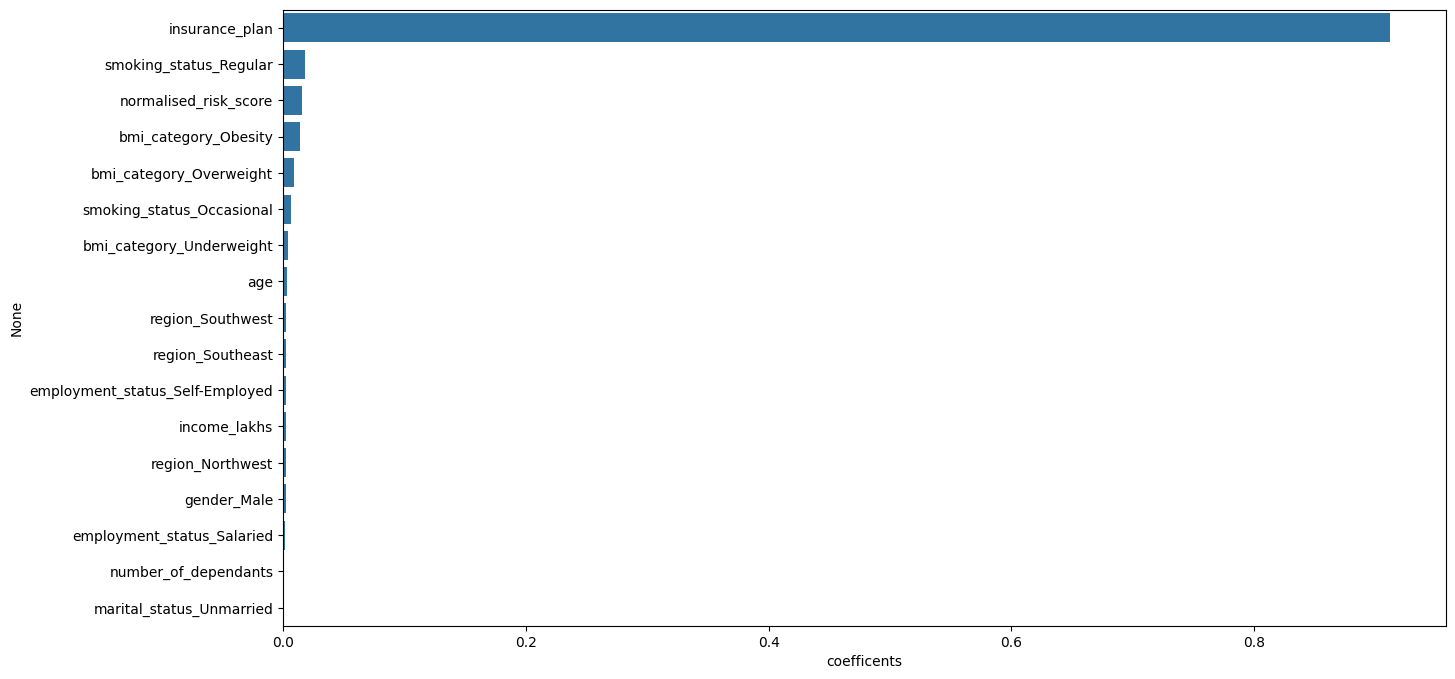

In [75]:
feature_imp = best_model.feature_importances_

cof_df = pd.DataFrame(feature_imp,index=x_test.columns,columns=['coefficents'])
cof_df = cof_df.sort_values(by='coefficents',ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(cof_df,x=cof_df['coefficents'],y=cof_df.index)

## Error Analysis

In [76]:
y_pred = best_model.predict(x_test)

residuals = y_pred - y_test
residuals_pct = residuals*100/y_test

result_df = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred,
    'diff':residuals,
    'diff_pct':residuals_pct
})

result_df.head() 

,actual,predicted,diff,diff_pct
10489,5452,6944.746094,1492.746094,27.379789
7989,9658,7533.948242,-2124.051758,-21.992667
3113,6031,8605.072266,2574.072266,42.680688
10605,12386,10463.995117,-1922.004883,-15.517559
4204,4245,7121.642090,2876.642090,67.765420


<Axes: xlabel='diff_pct', ylabel='Count'>

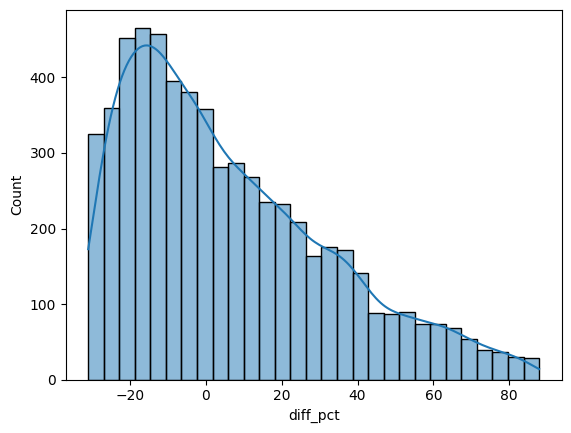

In [77]:
sns.histplot(result_df['diff_pct'],kde=True)

In [78]:
error_threshold = 10
error_df = result_df[np.abs(result_df['diff_pct']>error_threshold)]
error_df.shape

(2261, 4)

In [79]:
result_df.shape

(6026, 4)

In [80]:
# percentage of extrime error

extreme_error_pct = error_df.shape[0]*100/result_df.shape[0]
extreme_error_pct

37.52074344507136

here it says that more then 15% of the recoreds show an error margen of more then 10%

In [81]:
result_df[np.abs(result_df['diff_pct']>50)].sort_values('diff_pct',ascending=False)

,actual,predicted,diff,diff_pct
10165,3501,6577.392578,3076.392578,87.871825
12058,3503,6577.392578,3074.392578,87.764561
2975,3503,6565.185547,3062.185547,87.416088
17027,3521,6577.392578,3056.392578,86.804674
641,3522,6577.392578,3055.392578,86.751635
...,...,...,...,...
5558,4966,7459.756348,2493.756348,50.216600
19914,4379,6577.392578,2198.392578,50.203073
6915,5154,7739.484863,2585.484863,50.164627
3158,4381,6577.392578,2196.392578,50.134503


In [82]:
x_test.index

Index([10489,  7989,  3113, 10605,  4204, 16419,  6534,  1712, 15712, 10360,
       ...
       12378,  2039,  1023,  8235, 18542, 18960,   266, 10036, 15506, 10890],
      dtype='int64', length=6026)

In [83]:
error_df.index

Index([10489,  3113,  4204,  1712, 18164, 18105, 10268, 14203, 11223, 10787,
       ...
       13218, 19935, 16610,   219,  6215, 12378,  1023, 18542, 18960,   266],
      dtype='int64', length=2261)

In [84]:
x_test.loc[error_df.index]

,age,number_of_dependants,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
10489,0.428571,1.000000,0.080808,0.0,0.428571,1,0,0,0,0,0,0,0,0,0,0,0
3113,0.142857,0.000000,0.363636,0.0,1.000000,1,0,0,1,1,0,0,0,0,1,1,0
4204,0.000000,0.000000,0.222222,0.0,0.000000,0,0,1,0,1,0,0,1,0,1,0,0
1712,0.571429,0.000000,0.191919,0.0,0.000000,1,0,1,0,1,0,0,0,0,1,1,0
18164,0.571429,0.333333,0.151515,1.0,0.000000,1,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12378,0.857143,0.000000,0.060606,0.0,0.000000,0,1,0,0,1,0,0,0,0,0,0,1
1023,0.000000,0.333333,0.010101,0.5,0.000000,0,0,0,0,1,0,0,0,0,0,1,0
18542,0.285714,0.333333,0.040404,0.0,0.000000,1,0,1,0,1,1,0,0,0,0,0,0
18960,0.428571,0.333333,0.181818,0.0,0.000000,0,0,0,1,1,0,0,0,0,0,0,0


In [85]:
extreme_error_df = x_test.loc[error_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
10489,0.428571,1.000000,0.080808,0.0,0.428571,1,0,0,0,0,0,0,0,0,0,0,0
3113,0.142857,0.000000,0.363636,0.0,1.000000,1,0,0,1,1,0,0,0,0,1,1,0
4204,0.000000,0.000000,0.222222,0.0,0.000000,0,0,1,0,1,0,0,1,0,1,0,0
1712,0.571429,0.000000,0.191919,0.0,0.000000,1,0,1,0,1,0,0,0,0,1,1,0
18164,0.571429,0.333333,0.151515,1.0,0.000000,1,1,0,0,1,0,0,0,0,1,1,0


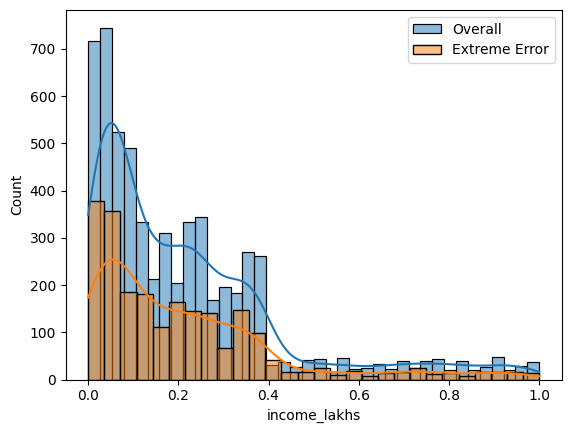

In [86]:
sns.histplot(x_test['income_lakhs'],label='Overall',kde=True)
sns.histplot(extreme_error_df['income_lakhs'],label='Extreme Error',kde=True)
plt.legend()
plt.show()

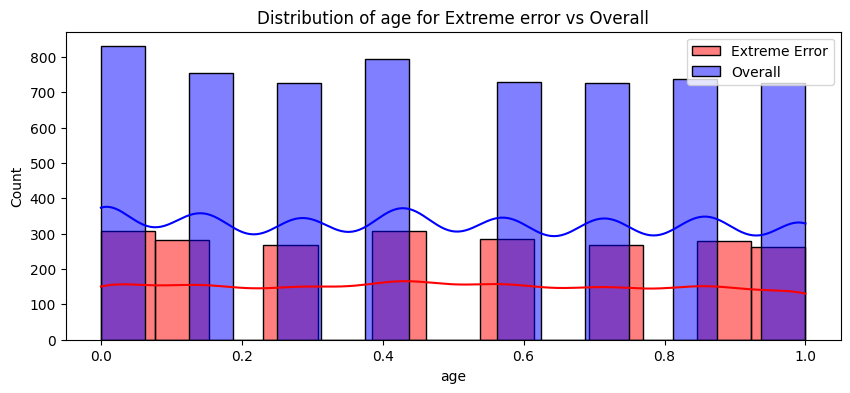

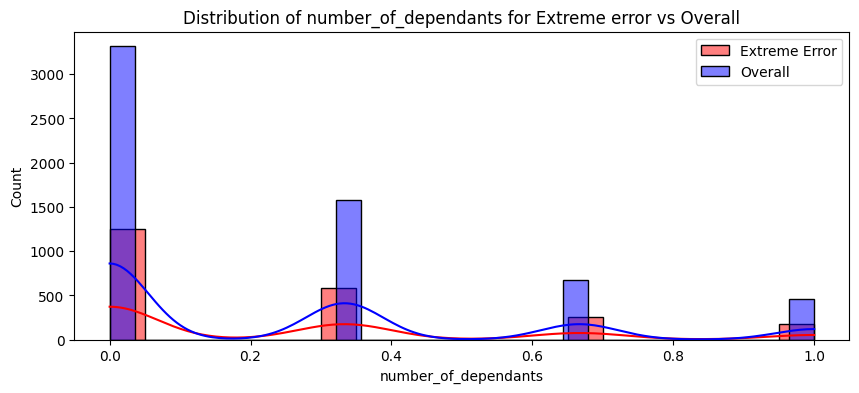

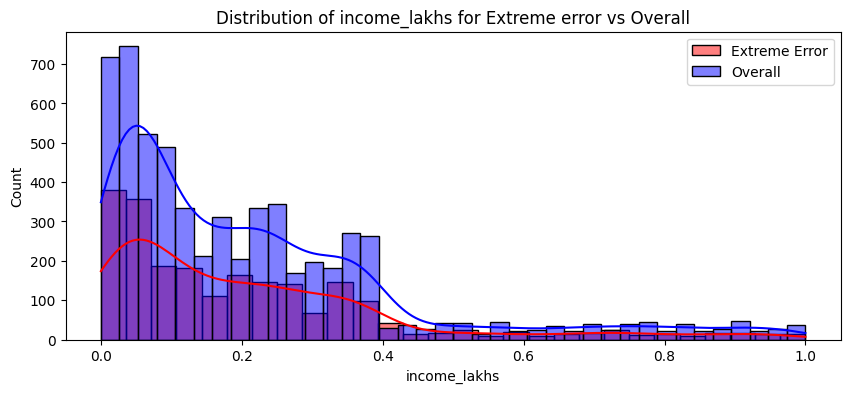

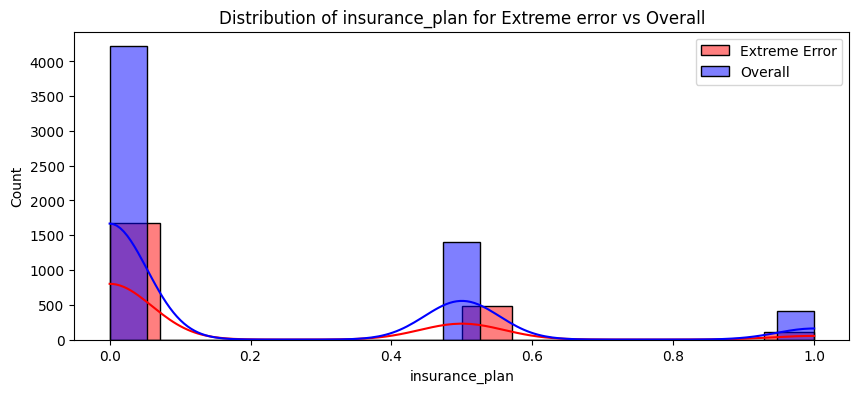

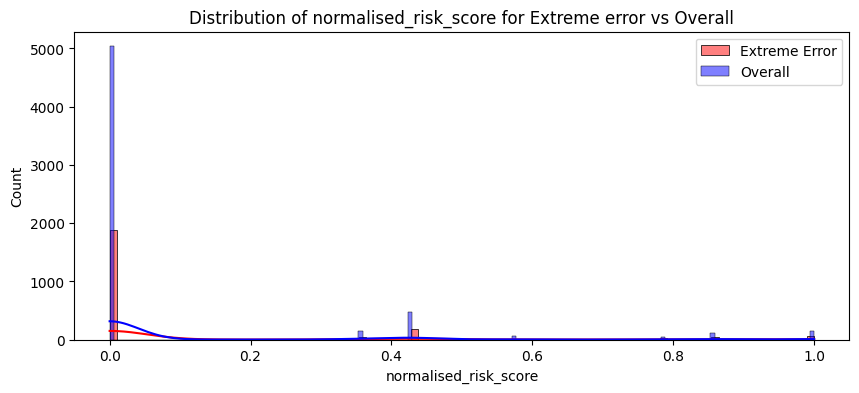

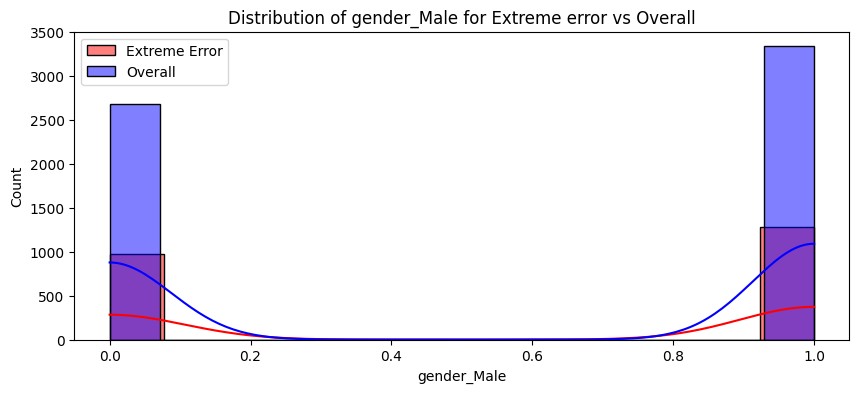

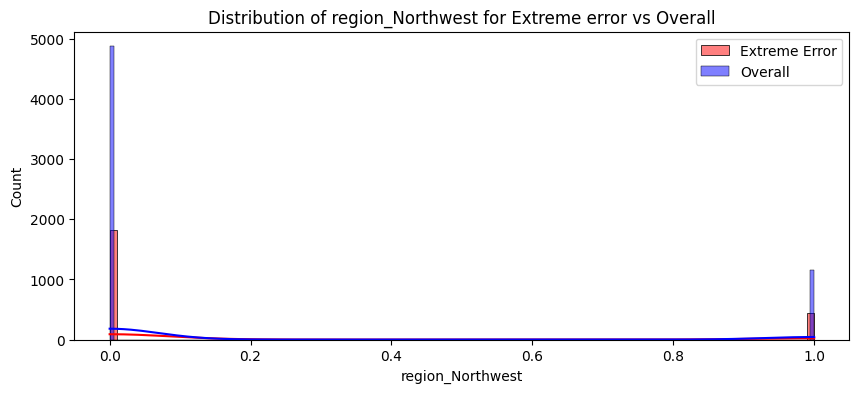

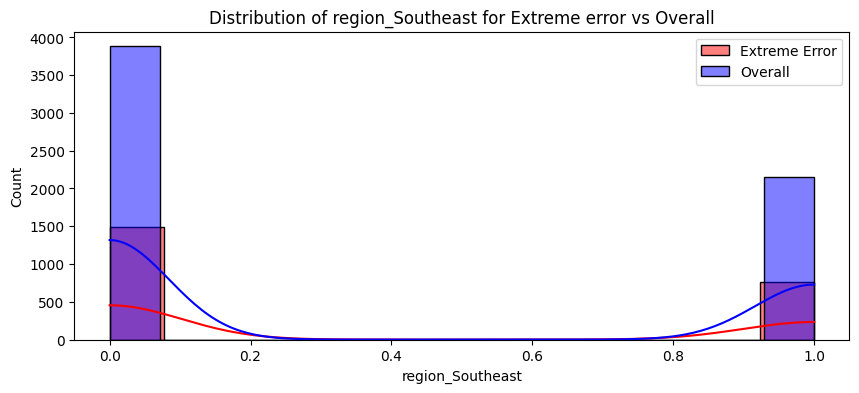

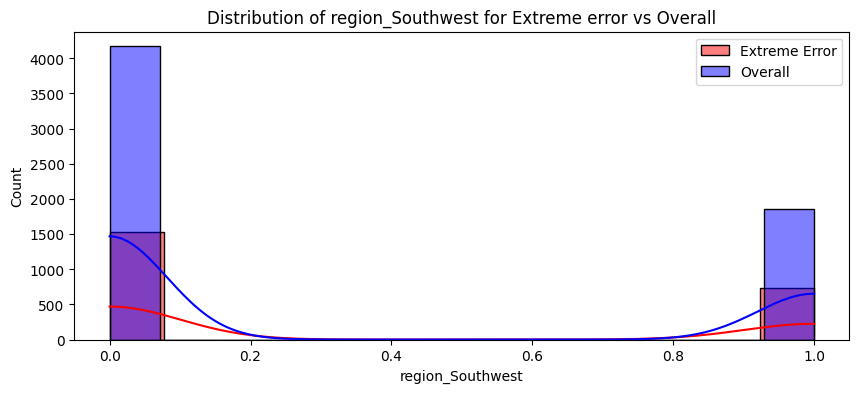

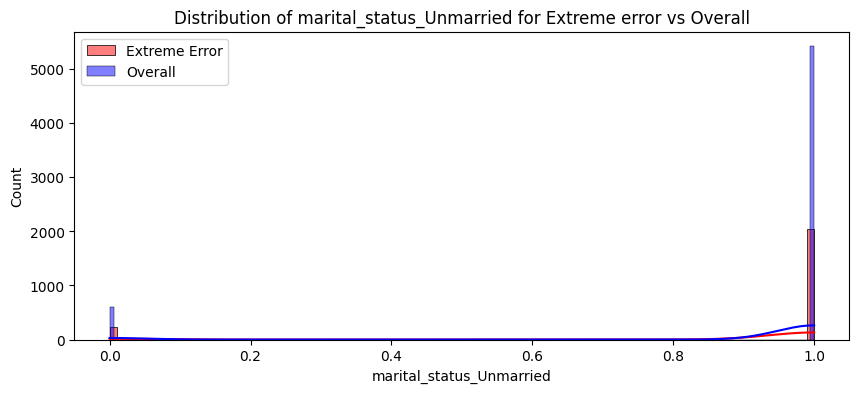

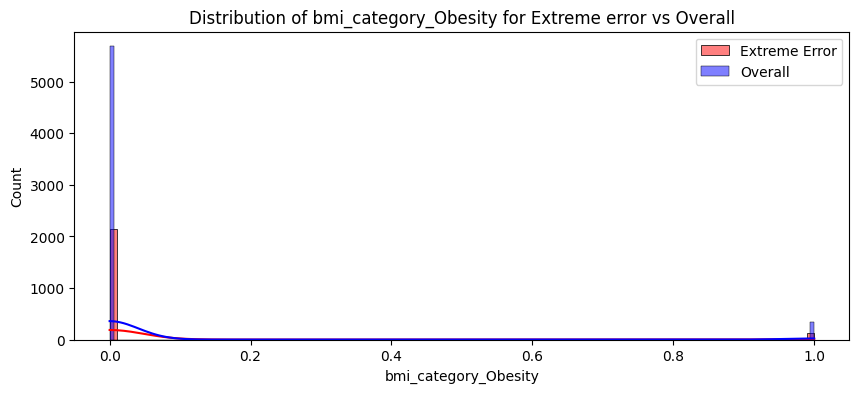

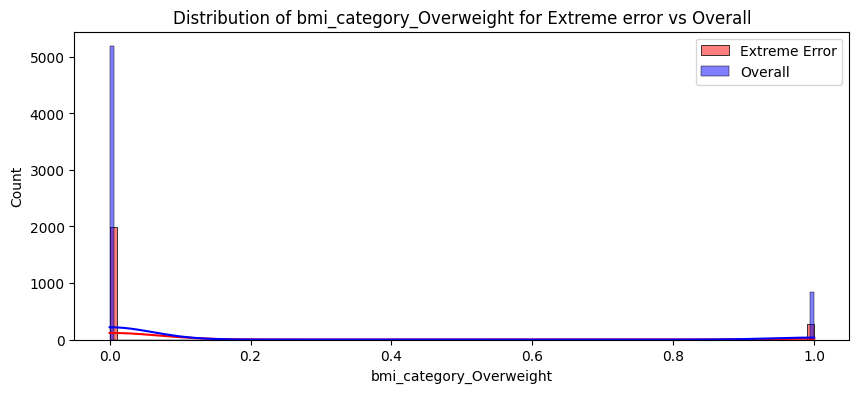

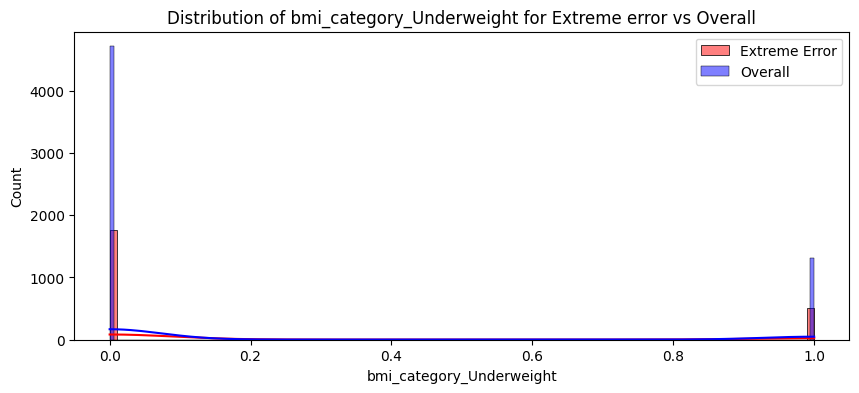

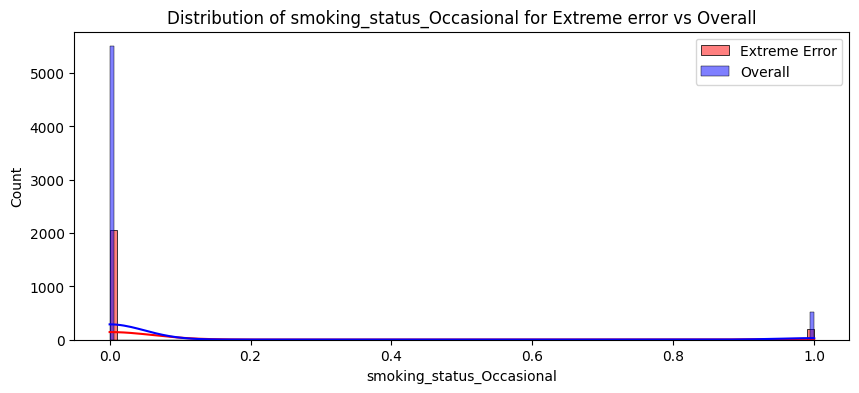

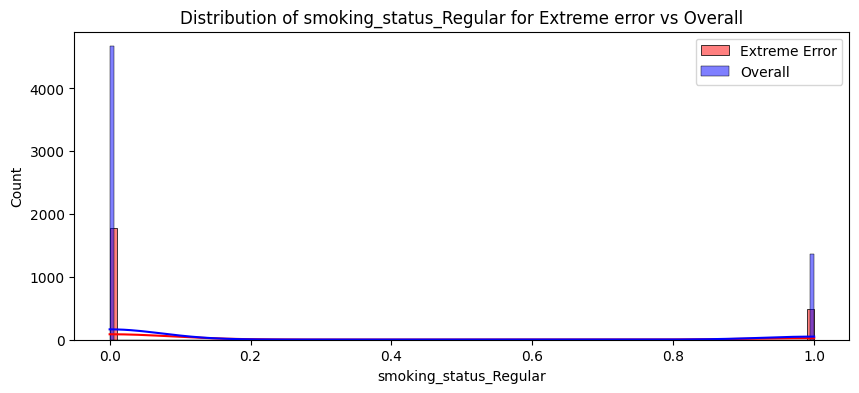

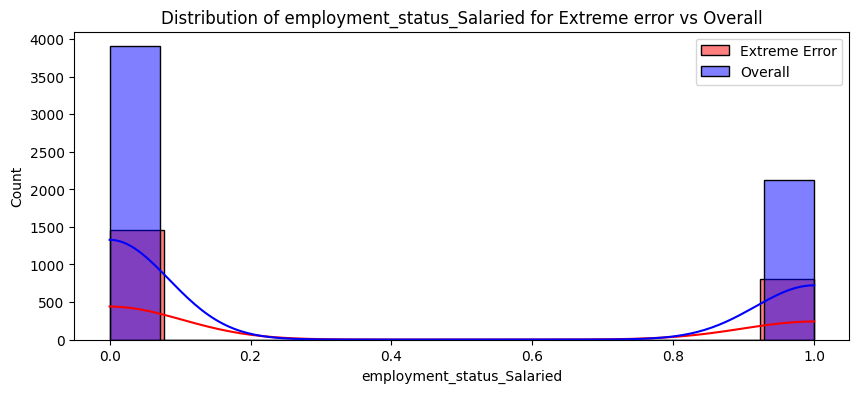

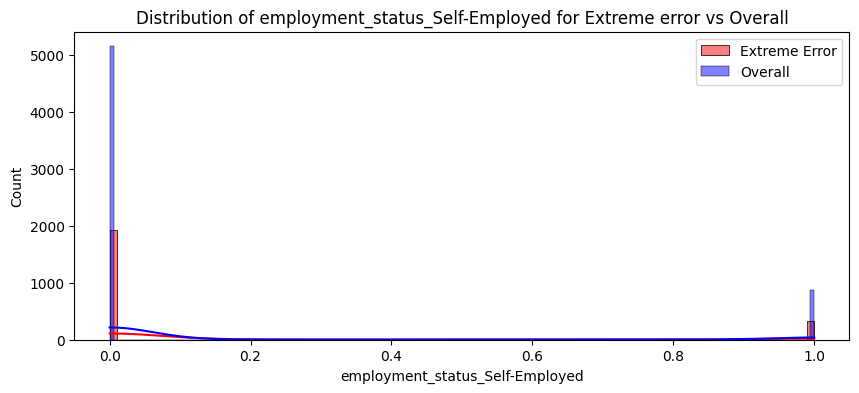

In [87]:
for x in x_test.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(extreme_error_df[x],color='red',label='Extreme Error',kde=True)
    sns.histplot(x_test[x],color='blue',label='Overall',alpha=0.5,kde=True)
    plt.legend()
    plt.title(f'Distribution of {x} for Extreme error vs Overall')
    plt.show()

here we saw that the kbe is differen in `age`

<Axes: xlabel='age', ylabel='Count'>

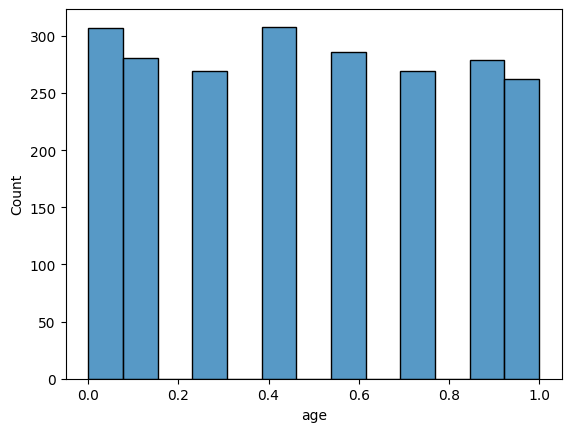

In [88]:
sns.histplot(extreme_error_df.age)

In [89]:
extreme_error_df['income_level'] =-1

In [90]:
df_reverse = pd.DataFrame()
df_reverse[col_to_scale] = scale.inverse_transform(extreme_error_df[col_to_scale])
df_reverse.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,21.0,3.0,-2.0,9.0,1.0
1,19.0,0.0,-2.0,37.0,1.0
2,18.0,0.0,-2.0,23.0,1.0
3,22.0,0.0,-2.0,20.0,1.0
4,22.0,1.0,-2.0,16.0,3.0


<Axes: xlabel='age', ylabel='Count'>

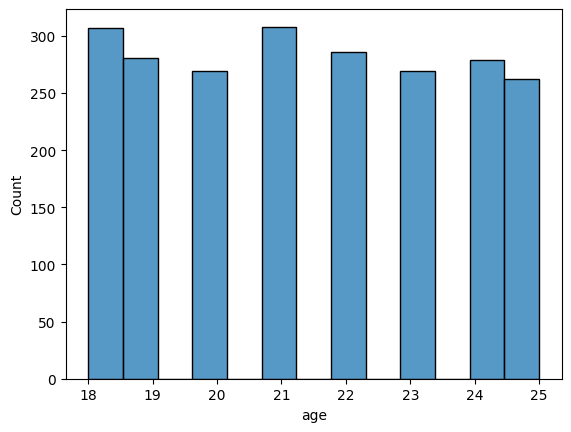

In [91]:
sns.histplot(df_reverse.age)

In [92]:
df_reverse.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,2261.000000,2261.000000,2261.0,2261.000000,2261.000000
mean,21.423264,0.712517,-2.0,22.048209,1.308713
std,2.286546,0.943805,0.0,20.932992,0.557538
min,18.000000,0.000000,-2.0,1.000000,1.000000
25%,19.000000,0.000000,-2.0,7.000000,1.000000
50%,21.000000,0.000000,-2.0,16.000000,1.000000
75%,23.000000,1.000000,-2.0,31.000000,2.000000
max,25.000000,3.000000,-2.0,100.000000,3.000000


In [93]:
df_reverse['age'].quantile(0.95)

np.float64(25.0)